In [15]:
import json
import os
import requests
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [16]:
# Step 1: Load the JSON data
with open('bcs_dataset.json', 'r') as f:
    data = json.load(f)
print(len(data))

413


[3.0, 3.25, 3.25, 4.25, 3.0, 4.25, 4.5, 4.5, 4.5, 2.75, 3.5, 3.25, 3.5, 4.25, 4.25, 4.25, 4.25, 3.25, 3.5, 3.5, 3.5, 3.5, 3.25, 3.25, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.25, 3.25, 3.25, 2.75, 2.75, 2.75, 4.25, 4.25, 4.0, 4.0, 3.0, 3.25, 3.25, 3.0, 3.0, 3.0, 3.25, 2.75, 3.0, 3.5, 3.5, 2.75, 3.25, 3.0, 3.0, 3.25, 3.5, 3.25, 3.25, 2.5, 3.5, 3.5, 3.5, 2.75, 2.75, 3.0, 3.25, 3.25, 3.5, 3.5, 3.5, 3.0, 3.5, 3.0, 3.5, 3.5, 3.0, 3.5, 3.5, 3.5, 3.5, 3.0, 3.5, 3.5, 4.25, 4.0, 2.5, 3.5, 3.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 2.5, 3.0, 3.0, 3.0, 3.0, 3.25, 3.25, 3.25, 3.25, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.25, 3.25, 4.0, 4.0, 3.5, 4.5, 4.25, 4.25, 4.25, 3.0, 3.0, 3.0, 2.75, 2.75, 4.5, 4.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.25, 3.25, 3.25, 3.5, 3.5, 3.5, 3.0, 3.25, 3.25, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 3.5, 3.25, 4.25, 4.25, 4.25, 3.0, 3.25, 3.5, 3.5, 3.5, 3.25, 3.25, 4.5, 4.5, 3.25, 3.25, 4.0, 4.0, 4.0, 3.5, 3.5, 3.5, 3.25, 3.25, 3.25, 3.0, 3.0, 3.0, 3.0, 3

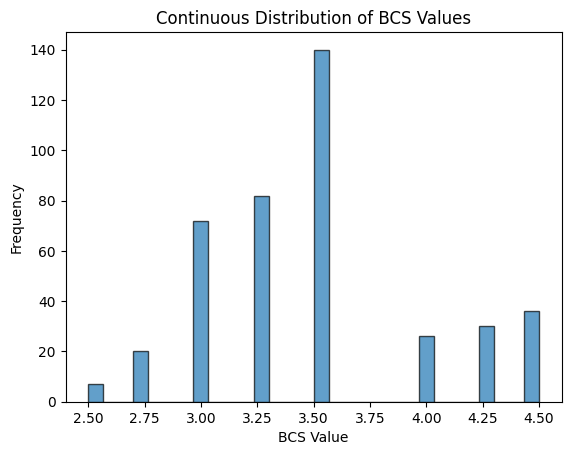

In [17]:
# Plot the distribution of BCS values
import matplotlib.pyplot as plt
bcs_values = [float(entry['BCS1']) for entry in data]
print(bcs_values)
plt.hist(bcs_values, bins=30, edgecolor='black', alpha=0.7)
print(np.histogram(bcs_values))
plt.xlabel('BCS Value')
plt.ylabel('Frequency')
plt.title('Continuous Distribution of BCS Values')
plt.show()

In [18]:
import cv2
# Step 2: Prepare the data (images and labels)
images = []
bcs_labels = []

for entry in data:
    image_path = os.path.join('cow_dataset/images', entry['cow_image_name'])
    if os.path.exists(image_path):
        # Read and resize the image
        img = cv2.imread(image_path)
        img = cv2.resize(img, (224, 224))
        images.append(img)

        # Round and convert BCS
        bcs_value = float(entry['BCS1'])
        bcs_value = int((bcs_value - 2.50)/0.25)
        bcs_labels.append(bcs_value)
    else:
        print(f"Missing image: {image_path}")

X = np.array(images) / 255.0
y = np.array(bcs_labels)
print(y)

[2 3 3 7 2 7 8 8 8 1 4 3 4 7 7 7 7 3 4 4 4 4 3 3 6 2 2 2 2 2 2 2 2 3 3 3 1
 1 1 7 7 6 6 2 3 3 2 2 2 3 1 2 4 4 1 3 2 2 3 4 3 3 0 4 4 4 1 1 2 3 3 4 4 4
 2 4 2 4 4 2 4 4 4 4 2 4 4 7 6 0 4 2 4 4 4 4 4 4 4 4 0 2 2 2 2 3 3 3 3 4 4
 4 4 4 4 4 4 4 4 4 3 3 6 6 4 8 7 7 7 2 2 2 1 1 8 8 4 4 4 4 4 4 3 3 3 4 4 4
 2 3 3 8 8 8 8 8 8 8 4 3 7 7 7 2 3 4 4 4 3 3 8 8 3 3 6 6 6 4 4 4 3 3 3 2 2
 2 2 4 4 4 4 4 6 6 6 6 8 4 4 4 4 8 8 3 3 3 2 3 3 7 2 7 8 8 8 1 4 3 4 7 7 7
 7 3 4 4 4 4 3 3 6 0 2 2 2 2 2 2 2 2 3 3 3 1 1 1 7 7 6 6 2 3 3 2 2 2 3 1 2
 4 4 1 3 2 2 3 4 3 3 0 4 4 4 1 1 2 3 3 4 4 4 2 4 2 4 4 2 4 4 4 4 2 4 4 7 6
 0 4 2 4 4 4 4 4 4 4 4 0 2 2 2 2 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 3 3 6 6 4 8
 7 7 7 2 2 2 1 1 8 8 4 4 4 4 4 4 3 3 3 4 4 4 2 3 3 8 8 8 8 8 8 8 4 3 7 7 7
 2 3 4 4 4 3 3 8 8 3 3 6 6 6 4 4 4 3 3 3 2 2 2 2 4 4 4 4 4 6 6 6 6 8 4 4 4
 4 8 8 3 3 3]


In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
# # Use Stratified Shuffle Split to ensure all classes are in the test set
# splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_idx, test_idx in splitter.split(X, y):
#     X_train, X_test = X[train_idx], X[test_idx]
#     y_train_raw, y_test_raw = y[train_idx], y[test_idx]
# print("Train class distribution:", np.bincount(y_train_raw))
# print("Test labels:", y_test_raw)

# Group indices by class
# from collections import defaultdict
# class_indices = defaultdict(list)
# for idx, label in enumerate(y):
#     class_indices[label].append(idx)

# # Select 1 sample per class for the test set
# test_indices = [indices[0] for indices in class_indices.values()]

# # Remaining for training
# all_indices = set(range(len(y)))
# train_indices = list(all_indices - set(test_indices))

# # Split the data
# X_train, X_test = X[train_indices], X[test_indices]
# y_train_raw, y_test_raw = y[train_indices], y[test_indices]

# print("Train class distribution:", np.bincount(y_train_raw))
# print("Test labels:", y_test_raw)

# Separate data by class
class_indices = {class_label: np.where(y == class_label)[0] for class_label in np.unique(y)}

# Initialize empty lists to store train and test indices
train_indices = []
test_indices = []

# Iterate over each class and split data
for class_label, indices in class_indices.items():
    n_samples = len(indices)
    n_train = int(n_samples * 0.8)  # 80% for training
    n_test = n_samples - n_train    # 20% for testing

    # Stratified split for this class
    splitter = StratifiedShuffleSplit(n_splits=1, test_size=n_test, random_state=42)
    for train_idx, test_idx in splitter.split(indices, np.zeros(len(indices))):  # We pass dummy targets for stratification
        train_indices.extend(indices[train_idx])
        test_indices.extend(indices[test_idx])

# Now we have the train and test indices
X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

# Check the class distribution in both sets
print("Train class distribution:", np.bincount(y_train))
print("Test class distribution:", np.bincount(y_test))

Train class distribution: [  5  16  57  65 112   0  20  24  28]
Test class distribution: [ 2  4 15 17 28  0  6  6  8]


In [20]:
# Step 4: Build the model using MobileNet
base_model = MobileNet(weights='imagenet', include_top=True, input_shape=(224, 224, 3))

In [21]:
# Freeze the layers of the base model
base_model.trainable = True

x = base_model.output
# x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(9, activation='softmax')(x)  # 9 classes (1-9 BCS)

In [22]:
# Create the model
model = Model(inputs=base_model.input, outputs=predictions)


In [23]:

# Step 5: Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',  # Sparse categorical cross-entropy for integer labels
              metrics=['accuracy'])


In [24]:
# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=4, validation_split=0.2)
# history = model.fit(X_train, y_train_raw, epochs=25, validation_split=0.2)

Epoch 1/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 113ms/step - accuracy: 0.2603 - loss: 2.1876 - val_accuracy: 0.0000e+00 - val_loss: 2.2064
Epoch 2/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.5345 - loss: 2.1127 - val_accuracy: 0.0000e+00 - val_loss: 2.2494
Epoch 3/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.6150 - loss: 2.0386 - val_accuracy: 0.0000e+00 - val_loss: 2.2781
Epoch 4/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - accuracy: 0.6250 - loss: 1.9685 - val_accuracy: 0.0000e+00 - val_loss: 2.3084
Epoch 5/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - accuracy: 0.6340 - loss: 1.8849 - val_accuracy: 0.0000e+00 - val_loss: 2.3518
Epoch 6/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - accuracy: 0.6300 - loss: 1.8144 - val_accuracy: 0.0000e+00 - val_loss: 2.3628
Epoch 7/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - accuracy: 0.5626 - loss: 1.7313 - val_accuracy: 0.0000e+00 - val_loss: 2.4344
Epoch 8/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - accuracy: 0.6727 - lo

In [25]:

# Step 7: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Step 8: Save the model
model.save('bcs_prediction_model.h5')

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - accuracy: 0.8136 - loss: 0.8880


Test Accuracy: 72.09%


In [26]:
import numpy as np
from collections import Counter

# After you split the data
print("✅ Test set BCS distribution:")
bcs_counts = Counter(y_test)
for bcs, count in sorted(bcs_counts.items()):
    print(f"BCS {bcs}: {count} samples")

print(f"\nTotal: {len(y_test)} test samples")


✅ Test set BCS distribution:
BCS 0: 2 samples
BCS 1: 4 samples
BCS 2: 15 samples
BCS 3: 17 samples
BCS 4: 28 samples
BCS 6: 6 samples
BCS 7: 6 samples
BCS 8: 8 samples

Total: 86 test samples


2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x317c1a790> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 596ms/step


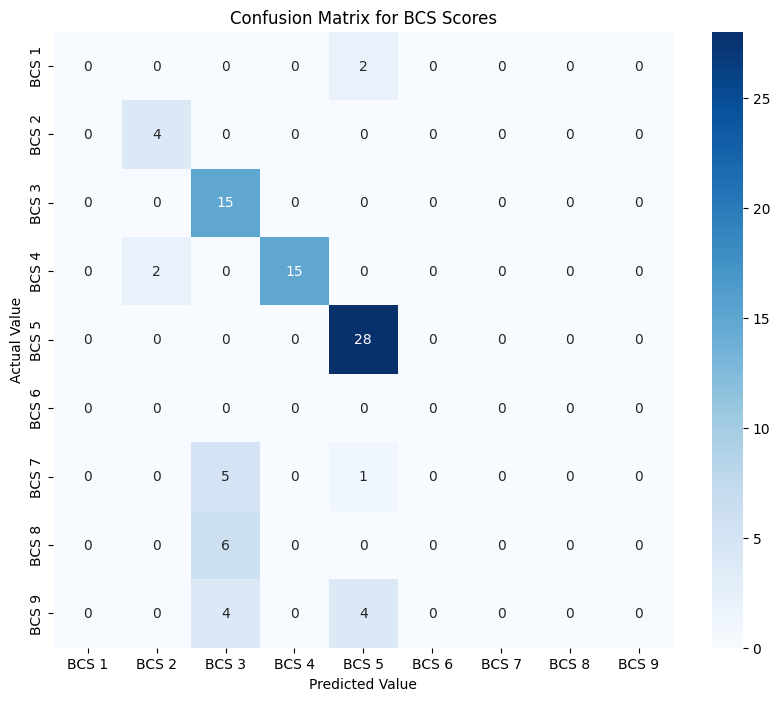


Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.67      1.00      0.80         4
           3       0.50      1.00      0.67        15
           4       1.00      0.88      0.94        17
           5       0.80      1.00      0.89        28
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         8

    accuracy                           0.72        86
   macro avg       0.33      0.43      0.37        86
weighted avg       0.58      0.72      0.63        86



In [27]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained model
model = load_model('bcs_prediction_model.h5')

# Predict class probabilities
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Adjust labels if you trained using BCS values 1–9
y_test_adj = y_test # Only if labels were originally 1-9

# Define all BCS class labels (0–8 representing BCS 1–9)
all_labels = list(range(9))

# Create confusion matrix with all 9 classes
cm = confusion_matrix(y_test_adj, y_pred, labels=all_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'BCS {i}' for i in range(1, 10)],
            yticklabels=[f'BCS {i}' for i in range(1, 10)])
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix for BCS Scores')
plt.show()

# Print classification report (force inclusion of all labels)
print("\nClassification Report:")
print(classification_report(
    y_test_adj, y_pred,
    labels=all_labels,
    target_names=[f'{i}' for i in range(1, 10)],
    zero_division=0  # Prevent errors if a class is missing
))


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 308ms/step


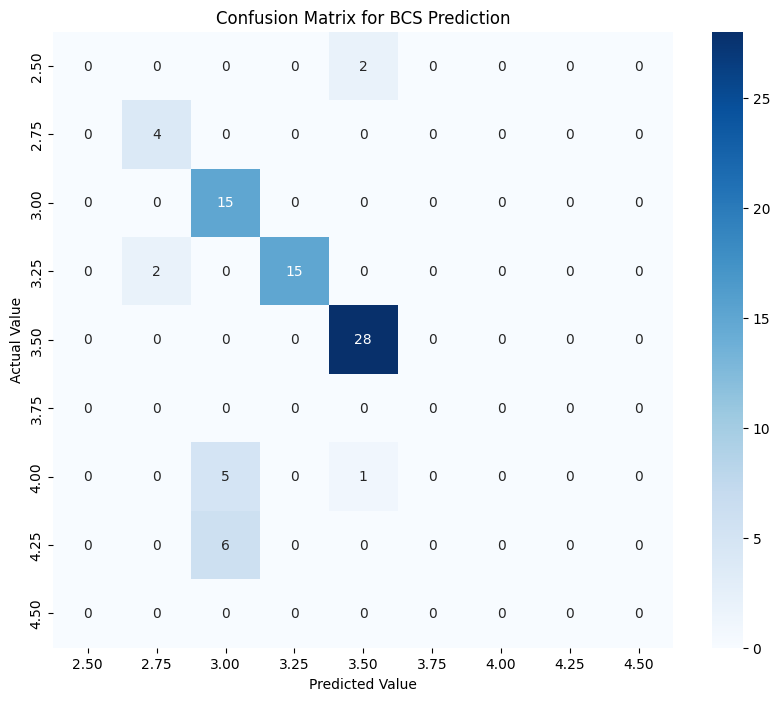


Classification Report:
              precision    recall  f1-score   support

        2.50       0.00      0.00      0.00         2
        2.75       0.67      1.00      0.80         4
        3.00       0.50      1.00      0.67        15
        3.25       1.00      0.88      0.94        17
        3.50       0.80      1.00      0.89        28
        3.75       0.00      0.00      0.00         0
        4.00       0.00      0.00      0.00         6
        4.25       0.00      0.00      0.00         6
        4.50       0.00      0.00      0.00         0

   micro avg       0.72      0.79      0.76        78
   macro avg       0.33      0.43      0.37        78
weighted avg       0.64      0.79      0.69        78



In [28]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained model
model = load_model('bcs_prediction_model.h5')

# Predict class probabilities
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Adjust labels if you trained using BCS values 2.50, 2.75, ..., 4.50
y_test_adj = y_test  # Adjust this if necessary

# Define the new BCS class labels
class_labels = [2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 4.25, 4.50]

# Map the predicted indices to the corresponding BCS values
y_pred_adjusted = [class_labels[i] for i in y_pred]

# Map the true indices to the corresponding BCS values
y_test_adjusted = [class_labels[i] for i in y_test_adj]

# Convert the continuous BCS values to their respective class indices
bins = np.linspace(2.50, 4.50, len(class_labels) + 1)  # Define bins for BCS classes
y_true_binned = np.digitize(y_test_adjusted, bins) - 1  # Bin true labels
y_pred_binned = np.digitize(y_pred_adjusted, bins) - 1  # Bin predicted labels

# Create confusion matrix with the new BCS class labels (as indices)
cm = confusion_matrix(y_true_binned, y_pred_binned, labels=range(len(class_labels)))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'{i:.2f}' for i in class_labels],
            yticklabels=[f'{i:.2f}' for i in class_labels])
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix for BCS Prediction')
plt.show()

# Print classification report (force inclusion of all labels)
print("\nClassification Report:")
print(classification_report(
    y_true_binned, y_pred_binned,
    labels=range(len(class_labels)),
    target_names=[f'{i:.2f}' for i in class_labels],
    zero_division=0  # Prevent errors if a class is missing
))
